Objective: Data Analysis and Visualization with Python
This notebook demonstrates how to load, explore, analyze, and visualize a dataset using the pandas, matplotlib, and seaborn libraries in Python. For this assignment, we'll use the classic Iris dataset.

Setup: Import Libraries
First, let's import the necessary libraries for our analysis.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


## Task 1: Load and Explore the Dataset
We'll start by loading the Iris dataset from a URL and performing an initial exploration to understand its structure and content.

### 1.1 Load the Data
We will load the dataset directly from a public URL into a pandas DataFrame. We'll use a try-except block to handle potential errors like a broken URL or network issues.



In [4]:
# URL for the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

try:
    # Load the dataset using pandas
    df = pd.read_csv(url, header=None, names=column_names)
    print("Dataset loaded successfully! 🚀")
except FileNotFoundError:
    print("Error: The file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# Display the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset loaded successfully! 🚀

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### 1.2 Explore Dataset Structure
Next, we'll check the dataset's structure, including the data types of each column and whether there are any missing values.

In [5]:
# Get a concise summary of the DataFrame
print("Dataset Information:")
df.info()

print("\n----------------------------------")

# Check for missing (null) values in each column
print("\nMissing Values Check:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

----------------------------------

Missing Values Check:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Findings:

The dataset contains 150 entries and 5 columns.

All four feature columns (sepal_length, sepal_width, petal_length, petal_width) are of type float64.

The target column (species) is of type object (a string).

🎉 Great news! There are no missing values, so no data cleaning is required for this step.

## Task 2: Basic Data Analysis
Now, let's perform some basic statistical analysis to uncover initial insights.

### 2.1 Descriptive Statistics
The .describe() method provides key statistical details for the numerical columns.


In [6]:
# Compute basic statistics for numerical columns
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Findings:
This table gives us the count, mean, standard deviation (std), minimum, maximum, and quartile values for each feature. For example, the average sepal_length is approximately 5.84 cm.

### 2.2 Grouping and Aggregation
Let's group the data by the species column and calculate the mean of the other features for each species. This helps us understand the typical measurements for each type of Iris flower.

In [7]:
# Group by the 'species' column and calculate the mean for each group
species_mean = df.groupby('species').mean()

print("Mean values for each species:")
print(species_mean)

Mean values for each species:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


Findings:
This analysis reveals clear patterns:

Iris-setosa generally has the smallest petals (petal_length and petal_width) but the widest sepals (sepal_width).

Iris-virginica has the largest petals and sepals on average.

Iris-versicolor falls in between the other two species in terms of measurements.

These distinct differences suggest that the features are good predictors for the flower's species.

## Task 3: Data Visualization
Visualizations are essential for understanding data patterns. Let's create four different types of plots. We'll set a nice visual style using seaborn first.

In [8]:
# Set the visual style for the plots
sns.set_style("whitegrid")

### 3.1 Line Chart: Trend of Sepal Length
Since the Iris dataset doesn't have a time component, we can plot a feature against the sample index to observe its trend or variation across the dataset.

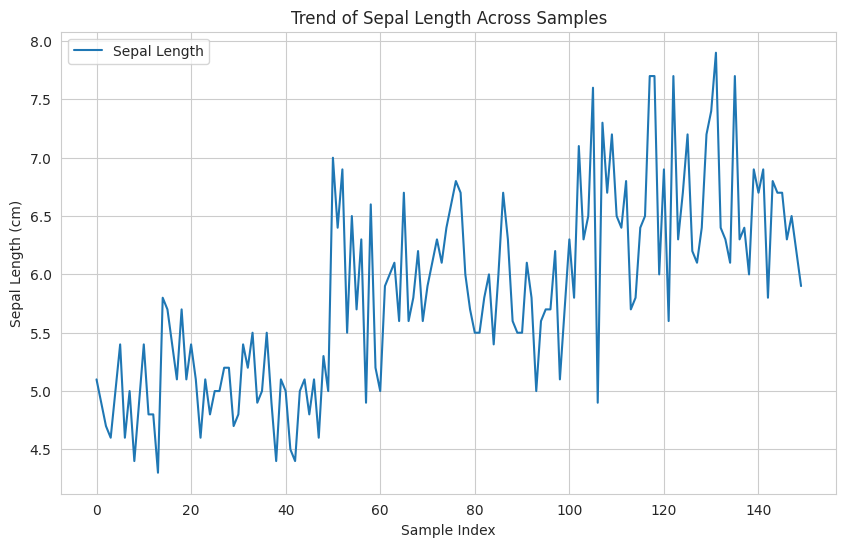

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sepal_length'], label='Sepal Length')
plt.title('Trend of Sepal Length Across Samples')
plt.xlabel('Sample Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.show()

Observation: This chart shows how sepal_length varies from one flower sample to the next. The clear shifts in the pattern (around index 50 and 100) correspond to the different species in the dataset.

### 3.2 Bar Chart: Average Petal Length by Species
A bar chart is perfect for comparing a numerical value across different categories.

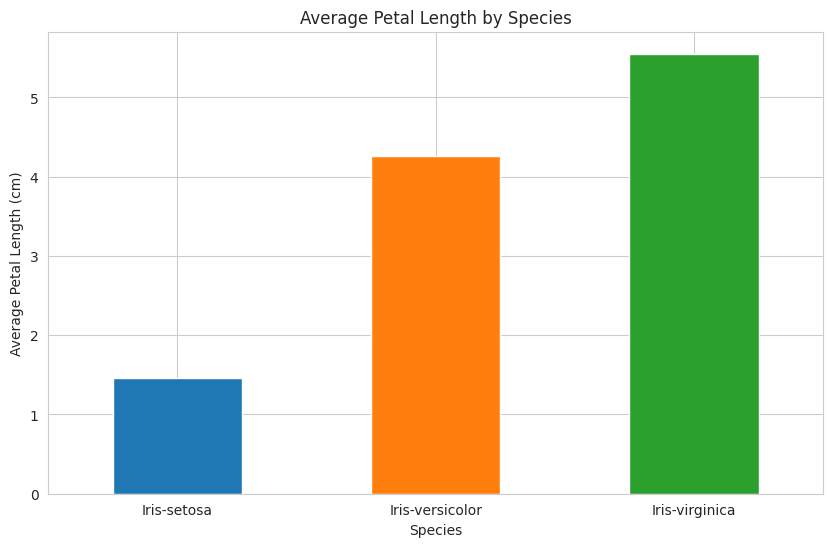

In [10]:
# Use the grouped data we calculated earlier
species_mean['petal_length'].plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.xticks(rotation=0) # Keep the x-axis labels horizontal
plt.show()

Observation: This chart visually confirms our earlier finding: Iris-setosa has a significantly smaller average petal length compared to Iris-versicolor and Iris-virginica.

### 3.3 Histogram: Distribution of Petal Width
A histogram helps us understand the distribution of a single numerical variable.

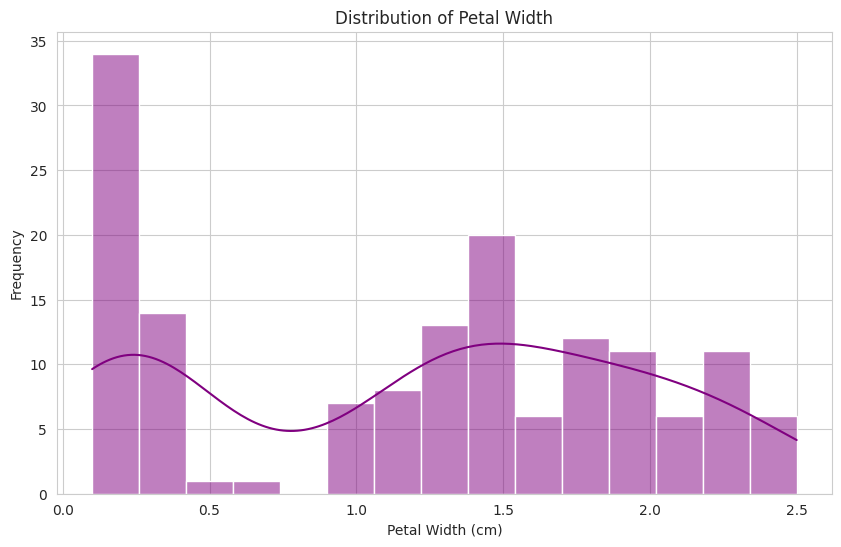

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['petal_width'], bins=15, kde=True, color='purple') # kde adds a density curve

plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()

Observation: The histogram shows that the petal_width values are not normally distributed. Instead, they are clustered into distinct groups, which likely represent the three different species.

### 3.4 Scatter Plot: Sepal Length vs. Sepal Width
A scatter plot is excellent for visualizing the relationship between two numerical variables. We can add a third dimension by coloring the points based on species.

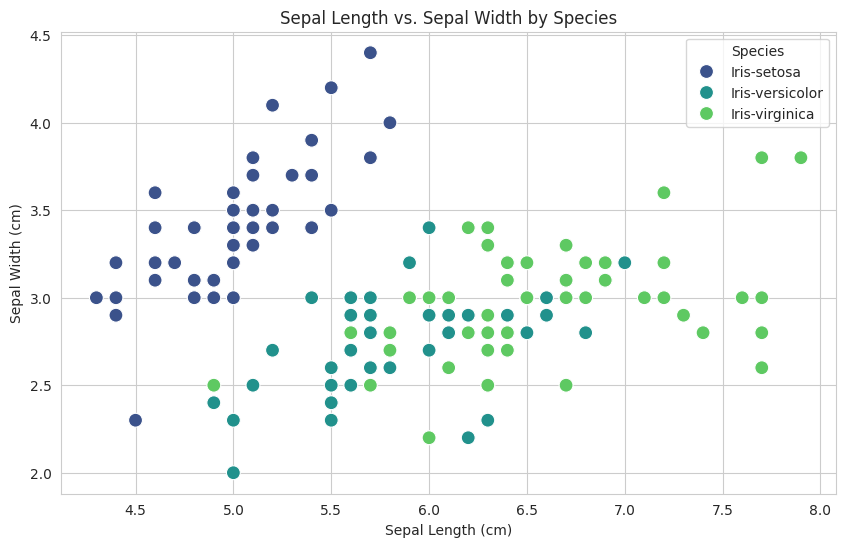

In [12]:
plt.figure(figsize=(10, 6))
# Create a scatter plot and color points by species
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, palette='viridis', s=100)

plt.title('Sepal Length vs. Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

Observation: This plot reveals a strong relationship between the features and the species. The Iris-setosa cluster is clearly separated from the other two species, which have some overlap but are still largely distinct. This visualization reinforces that these features are useful for classification.